# Visualize extraction of cell-averaged features

The most important feature in the subgrid-scale modeling of reactive species boundary layers is the cell-averaged concentration. In the target simulation, this concentration is the only one that is known and the idea is to reconstruct an approximate concentration profile from the average. In the simulation used to generate the training data, the concentration field is highly resolved such that it is possible to down-sample the solution on coarser meshes while knowing the numerically predicted fluxes on the fine mesh at a certain position normal to the interface.

The following sketch aims to visualize this process. The reference profile is the same as in the notebook *sgs_boundary_value_problem.ipynb*.

In [1]:
import helper_module as hm
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.integrate import solve_bvp
import numpy as np

%matplotlib inline
rc('text', usetex=True)

def func(x, c):
    source = 1000*np.power(c[0], 2)*c[2]
    return np.vstack((c[1], 2*source, c[3], source, c[5], -source))

def bc(c_a, c_b):
    return np.array([c_a[0] - 1.0, c_a[3], c_a[4], c_b[0], c_b[2] - 1.0, c_b[4]])

x = np.linspace(0, 1.0, 20)
c_init = np.zeros((6, x.size))
res = solve_bvp(func, bc, x, c_init)

x_plot = np.linspace(0, 1, 100)
y_plot_a = res.sol(x_plot)[0] # species A

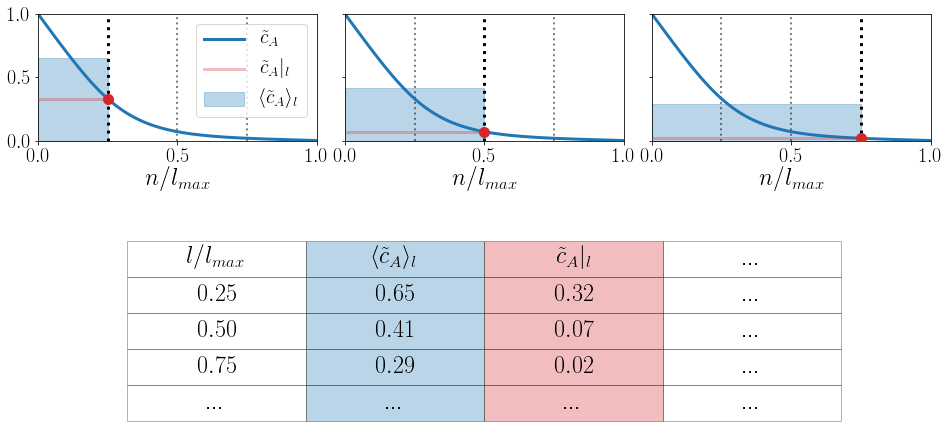

In [2]:
fig = plt.figure(figsize=(16, 7.0))

grid = plt.GridSpec(2, 3, wspace=0.1, hspace=1.0)
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[0, 2])
ax4 = plt.subplot(grid[1, :])


# simple approximation of cell average
av_cell_1 = np.sum(y_plot_a[:25]) / 25
av_cell_2 = np.sum(y_plot_a[:50]) / 50
av_cell_3 = np.sum(y_plot_a[:75]) / 75

ax1.fill_between([0, 0.25], [0, 0], [av_cell_1, av_cell_1], color="C0", alpha=0.3, label=r"$\langle \tilde{c}_A \rangle_l$")
ax2.fill_between([0, 0.50], [0, 0], [av_cell_2, av_cell_2], color="C0", alpha=0.3)
ax3.fill_between([0, 0.75], [0, 0], [av_cell_3, av_cell_3], color="C0", alpha=0.3)

ax1.axvline(0.25, 0, 1, linestyle=':', color='k', lw=3, alpha=1.0)
ax1.axvline(0.5, 0, 1, linestyle=':', color='k', lw=2, alpha=0.5)
ax1.axvline(0.75, 0, 1, linestyle=':', color='k', lw=2, alpha=0.5)
ax2.axvline(0.25, 0, 1, linestyle=':', color='k', lw=2, alpha=0.5)
ax2.axvline(0.5, 0, 1, linestyle=':', color='k', lw=3, alpha=1.0)
ax2.axvline(0.75, 0, 1, linestyle=':', color='k', lw=2, alpha=0.5)
ax3.axvline(0.25, 0, 1, linestyle=':', color='k', lw=2, alpha=0.5)
ax3.axvline(0.5, 0, 1, linestyle=':', color='k', lw=2, alpha=0.5)
ax3.axvline(0.75, 0, 1, linestyle=':', color='k', lw=3, alpha=1.0)

for ax in [ax1, ax2, ax3]:
    ax.plot(x_plot, y_plot_a, ls='-', c='C0', linewidth=hm.line_width, label=r"$\tilde{c}_A$")
    ax.set_xticks([0.0, 0.5, 1.0])
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.tick_params(labelsize=hm.fontsize_tick)
    ax.set_xlabel(r"$n/l_{max}$", fontsize=hm.fontsize_label)
    
ax1.plot([0.0, 0.25], [y_plot_a[25], y_plot_a[25]], lw=3, color="C3", alpha=0.3, zorder=6, label=r"$\tilde{c}_A|_l$")
ax1.scatter(0.25, y_plot_a[25], s=100, color="C3", marker="o", zorder=6)
ax2.plot([0.0, 0.5], [y_plot_a[50], y_plot_a[50]], lw=3, color="C3", alpha=0.3, zorder=6)
ax2.scatter(0.5, y_plot_a[50], s=100, color="C3", marker="o", zorder=6)
ax3.plot([0.0, 0.75], [y_plot_a[75], y_plot_a[75]], lw=3, color="C3", alpha=0.3, zorder=6)
ax3.scatter(0.75, y_plot_a[75], s=100, color="C3", marker="o", zorder=6)
    
for ax in [ax2, ax3]:
    ax.set_yticklabels([])
    
ax1.legend(fontsize=hm.fontsize_legend)

columns = (r"$l/l_{max}$", r"$\langle \tilde{c}_A \rangle_l$", r"$\tilde{c}_A|_l$", "...")
cell_text = [[r"$0.25$", r"${:0.2f}$".format(av_cell_1), r"${:0.2f}$".format(y_plot_a[25]), "..."],
             [r"$0.50$", r"${:0.2f}$".format(av_cell_2), r"${:0.2f}$".format(y_plot_a[50]), "..."],
             [r"$0.75$", r"${:0.2f}$".format(av_cell_3), r"${:0.2f}$".format(y_plot_a[75]), "..."],
             ["...", "...", "...", "..."]]

colours = [["w", "C0", "C3", "w"]]*4

val_table = ax4.table(cellText=cell_text, colLabels=columns, cellColours=colours, loc="center",
                      colWidths=[0.2] * 4, colColours=["w", "C0", "C3", "w"], cellLoc="center")
val_table.auto_set_font_size(False)
val_table.set_fontsize(hm.fontsize_label)
val_table.scale(1, 3)
for cell in val_table._cells:
    val_table._cells[cell].set_alpha(0.3)
ax4.axis("off")


plt.savefig("../output/sgs_feature_label_extraction.pdf", bbox_inches='tight')
plt.savefig("../output/sgs_feature_label_extraction.png", bbox_inches='tight')